# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
weather_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table_elements = weather_soup.find_all('tr',class_='data-row')

row_data = [row.get_text() for row in table_elements]

row_data_complete = []
for row in row_data:
    new_row = row.splitlines()
    row_data_complete.append(new_row)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
weather_data = []

# Loop through the scraped data to create a list of rows
for row in row_data_complete:
    table_dict = {}
    table_dict['id'] = row[1]
    table_dict['terrestrial_date'] = row[2]
    table_dict['sol'] = row[3]
    table_dict['ls'] = row[4]
    table_dict['month'] = row[5]
    table_dict['min_temp'] = row[6]
    table_dict['pressure'] = row[7]
    weather_data.append(table_dict)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(weather_data, columns=['id','terrestrial_date','sol','ls','month','min_temp','pressure'])

In [8]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df = weather_df.astype({'sol':int, 'ls':int, 'month':int, 'min_temp':float, 'pressure':float})

In [11]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
months = weather_df['month'].nunique()
print(f'There are {months} months on Mars.')

There are 12 months on Mars.


In [13]:
# 2. How many Martian days' worth of data are there?
days = weather_df['sol'].nunique()
print(f"There are {days} days' worth of data.")

There are 1867 days' worth of data.


In [14]:
# 3. What is the average low temperature by month?
avg_temp_df = weather_df['min_temp'].groupby(weather_df['month']).mean()
avg_temp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

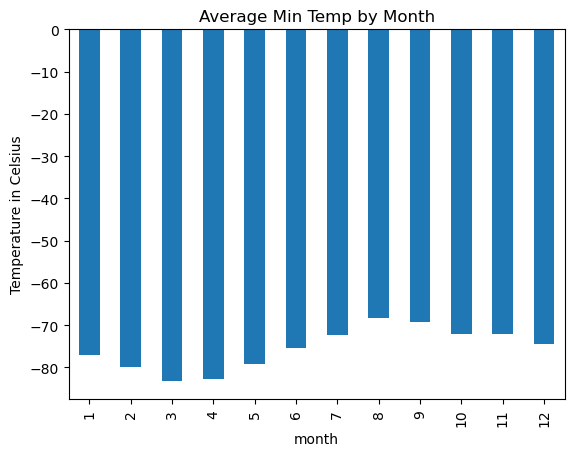

In [15]:
# Plot the average temperature by month
avg_temp_df.plot(kind='bar',ylabel='Temperature in Celsius',title='Average Min Temp by Month')
plt.show()

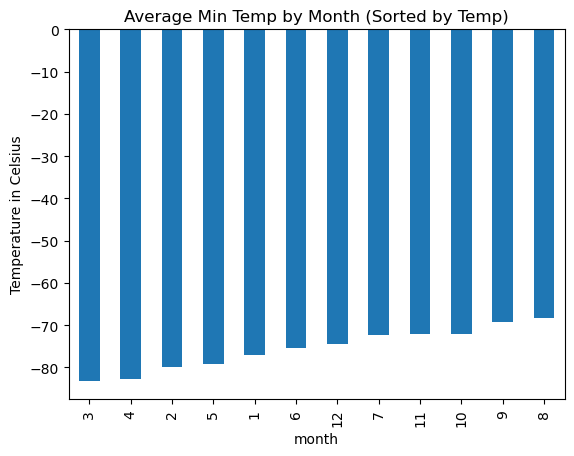

In [16]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp_df_sorted = avg_temp_df.sort_values()
avg_temp_df_sorted.plot(kind='bar',ylabel='Temperature in Celsius',title='Average Min Temp by Month (Sorted by Temp)')
plt.show()

In [17]:
# 4. Average pressure by Martian month
avg_pressure_df = weather_df['pressure'].groupby(weather_df['month']).mean()
avg_pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

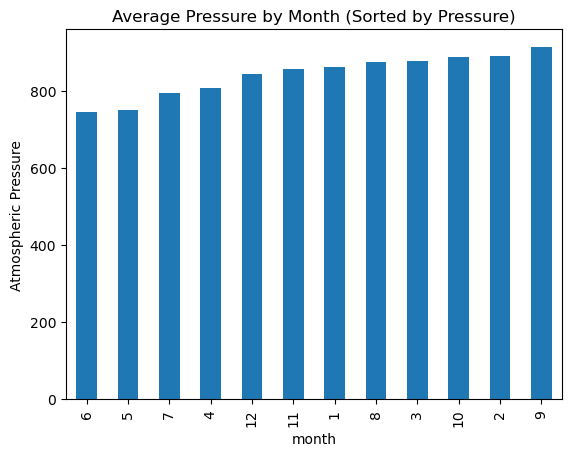

In [18]:
# Plot the average pressure by month
avg_pressure_df_sorted = avg_pressure_df.sort_values()
avg_pressure_df_sorted.plot(kind='bar',ylabel='Atmospheric Pressure',title='Average Pressure by Month (Sorted by Pressure)')
plt.show()

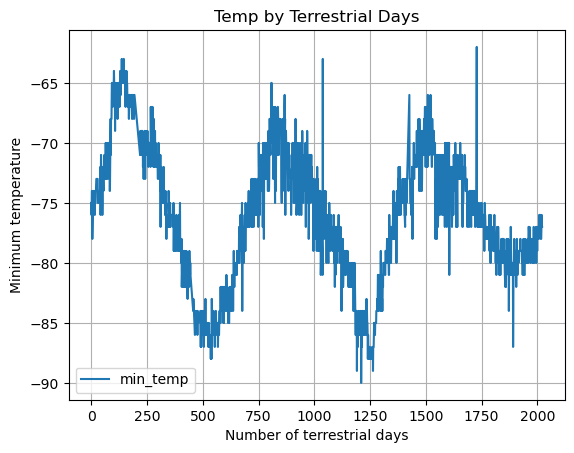

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Make a copy of the dataframe
time_delta_df = weather_df.copy()

# Calculate the first date in the dataset
initial_date = time_delta_df.at[0,'terrestrial_date']

# Add a column to the dataframe calculating number of elapsed terrestrial days from first day in dataset
time_delta_df['timedelta'] = time_delta_df['terrestrial_date']-initial_date
time_delta_df['timedelta'] = time_delta_df['timedelta'].dt.days.astype(float)

# Plot the temperature by elapsed terrestrial days
time_delta_df.plot(x='timedelta',y='min_temp',title='Temp by Terrestrial Days',ylabel='Minimum temperature',xlabel='Number of terrestrial days')
plt.grid()
plt.show()

### Analysis

**How many months exist on Mars?**

There are 12 months on Mars.

**How many Martian (and not Earth) days worth of data exist in the scraped dataset?**

There are 1867 Martian days' worth of data in the scraped dataset.

**What are the coldest and the warmest months on Mars (at the location of Curiosity)?**

The third month has the coldest temperatures on average, and the eighth month has the warmest temperatures.

**Which months have the lowest and the highest atmospheric pressure on Mars?**

The sixth month has the lowest atmospheric pressure on average, and the ninth month has the highest pressure.

**About how many terrestrial (Earth) days exist in a Martian year?**

The distance from trough to trough on the temperature graph is about 700 terrestrial days (~1200 to ~500). According to NASA, a Mars year is equivalent to 687 terrestrial days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
weather_df.to_csv("C:/Users/adina/Desktop/Classwork/Module 11 Data Collection/Module 11 Challenge/webscraping-challenge/mars_weather_data.csv",index=False)

In [21]:
browser.quit()